## Bibliotecas

In [3]:
import session_info

import pandas as pd
import numpy as np
import os

import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime

import warnings
warnings.filterwarnings("ignore")

In [81]:
os.chdir('D:/jean_/OneDrive/Profissional/Analista de Dados/Casos dengue RJ/documents/')
diretorio_atual = os.getcwd()

## Importando arquivos

In [4]:
df_dengue = pd.read_csv('datasus_dengue_rj_2014_2023.csv', sep = ';', decimal = ',', encoding = 'ISO-8859-1')
df_clima = pd.read_csv('dados_A652_D_2014-01-01_2023-11-30.csv', sep = ';', decimal = '.', encoding = 'ISO-8859-1', parse_dates = ['Data Medicao'])

In [5]:
df_dengue

,mes_notificacao,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Janeiro,-,1504,2530,16669,1513,1112,1419,1011,75,78,1207
1,Fevereiro,-,1018,3332,16497,1372,1520,1193,1010,158,236,2832
2,Marco,-,816,9687,17427,1638,2656,2949,870,334,913,6756
3,Abril,-,775,14245,18464,1314,2967,7295,499,644,1701,7671
4,Maio,-,807,14702,10260,1424,2042,10303,300,457,3066,7981
5,Junho,-,557,8415,3662,833,1139,4423,157,382,1765,5977
6,Julho,-,407,3885,1934,602,941,1965,154,229,901,1044
7,Agosto,-,382,2933,885,434,583,751,118,167,603,-
8,Setembro,-,381,1842,565,336,329,539,111,113,376,-
9,Outubro,-,467,1521,487,447,405,416,110,68,450,-


In [6]:
df_dengue.drop(columns = ['2013'], inplace = True)
df_dengue['2023'] = df_dengue['2023'].replace('-', 0)
df_dengue['mes_notificacao'] = df_dengue['mes_notificacao'].replace('Marco', 'Março')

In [7]:
df_dengue

,mes_notificacao,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Janeiro,1504,2530,16669,1513,1112,1419,1011,75,78,1207
1,Fevereiro,1018,3332,16497,1372,1520,1193,1010,158,236,2832
2,Março,816,9687,17427,1638,2656,2949,870,334,913,6756
3,Abril,775,14245,18464,1314,2967,7295,499,644,1701,7671
4,Maio,807,14702,10260,1424,2042,10303,300,457,3066,7981
5,Junho,557,8415,3662,833,1139,4423,157,382,1765,5977
6,Julho,407,3885,1934,602,941,1965,154,229,901,1044
7,Agosto,382,2933,885,434,583,751,118,167,603,0
8,Setembro,381,1842,565,336,329,539,111,113,376,0
9,Outubro,467,1521,487,447,405,416,110,68,450,0


In [8]:
df_clima.head(5)

,Data Medicao,PRECIPITACAO TOTAL (mm),TEMPERATURA MAXIMA (CELCIUS),TEMPERATURA MEDIA (CELCIUS),TEMPERATURA MINIMA (CELCIUS),"UMIDADE RELATIVA DO AR, MEDIA DIARIA (AUT)(%)"
0,01/01/2014,0.2,34.2,29.825,26.1,68.791.667
1,02/01/2014,0.0,33.4,28.804.167,24.7,69.916.667
2,03/01/2014,0.0,32.9,29.416.667,26.9,73.916.667
3,04/01/2014,0.0,31.9,28.975,26.7,78.666.667
4,05/01/2014,0.0,34.4,281.875,24.7,74.833.333


## Análise de Dados

### Tratamento - Casos de Dengue

In [9]:
df_dengue_2014 = df_dengue[['mes_notificacao', '2014']]

In [10]:
df_dengue_2014['Data_referencia'] = df_dengue_2014['mes_notificacao'] + '/2014'

In [11]:
df_dengue_2014['Quantidade'] = df_dengue_2014['2014']

In [12]:
df_dengue_2014.drop(columns = ['mes_notificacao', '2014'], inplace = True)

In [13]:
df_dengue_2014.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Data_referencia  12 non-null     object
 1   Quantidade       12 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 320.0+ bytes


#### Função para tratamento dos dados de dengue

In [14]:
def tratando_dataframe(df_original, ano):
    df = df_original[['mes_notificacao', f'{ano}']]
    df['Data_referencia'] = df['mes_notificacao'] + f'/{ano}'
    df['Quantidade'] = df[f'{ano}'].apply(pd.to_numeric)
    df.drop(columns = ['mes_notificacao', f'{ano}'], inplace = True)

    return df

In [15]:
df_dengue_2015 = tratando_dataframe(df_dengue, 2015)
df_dengue_2016 = tratando_dataframe(df_dengue, 2016)
df_dengue_2017 = tratando_dataframe(df_dengue, 2017)
df_dengue_2018 = tratando_dataframe(df_dengue, 2018)
df_dengue_2019 = tratando_dataframe(df_dengue, 2019)
df_dengue_2020 = tratando_dataframe(df_dengue, 2020)
df_dengue_2021 = tratando_dataframe(df_dengue, 2021)
df_dengue_2022 = tratando_dataframe(df_dengue, 2022)
df_dengue_2023 = tratando_dataframe(df_dengue, 2023)

In [16]:
df_dengue_2014.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Data_referencia  12 non-null     object
 1   Quantidade       12 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 320.0+ bytes


In [17]:
df_dengue_2015.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Data_referencia  12 non-null     object
 1   Quantidade       12 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 320.0+ bytes


In [18]:
df_dengue_2016.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Data_referencia  12 non-null     object
 1   Quantidade       12 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 320.0+ bytes


In [19]:
df_dengue_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Data_referencia  12 non-null     object
 1   Quantidade       12 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 320.0+ bytes


In [20]:
df_dengue_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Data_referencia  12 non-null     object
 1   Quantidade       12 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 320.0+ bytes


In [21]:
df_dengue_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Data_referencia  12 non-null     object
 1   Quantidade       12 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 320.0+ bytes


In [22]:
df_dengue_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Data_referencia  12 non-null     object
 1   Quantidade       12 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 320.0+ bytes


In [23]:
df_dengue_2021.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Data_referencia  12 non-null     object
 1   Quantidade       12 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 320.0+ bytes


In [24]:
df_dengue_2022.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Data_referencia  12 non-null     object
 1   Quantidade       12 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 320.0+ bytes


In [25]:
df_dengue_2023.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Data_referencia  12 non-null     object
 1   Quantidade       12 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 320.0+ bytes


#### Juntando todos dataframes

In [26]:
df_dengue_completo = pd.concat([df_dengue_2014, df_dengue_2015], ignore_index = True)
df_dengue_completo = pd.concat([df_dengue_completo, df_dengue_2016], ignore_index = True)
df_dengue_completo = pd.concat([df_dengue_completo, df_dengue_2017], ignore_index = True)
df_dengue_completo = pd.concat([df_dengue_completo, df_dengue_2018], ignore_index = True)
df_dengue_completo = pd.concat([df_dengue_completo, df_dengue_2019], ignore_index = True)
df_dengue_completo = pd.concat([df_dengue_completo, df_dengue_2020], ignore_index = True)
df_dengue_completo = pd.concat([df_dengue_completo, df_dengue_2021], ignore_index = True)
df_dengue_completo = pd.concat([df_dengue_completo, df_dengue_2022], ignore_index = True)
df_dengue_completo = pd.concat([df_dengue_completo, df_dengue_2023], ignore_index = True)

In [27]:
df_dengue_completo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Data_referencia  120 non-null    object
 1   Quantidade       120 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.0+ KB


In [5]:
import locale

locale.setlocale(locale.LC_ALL, 'pt_BR')

'pt_BR'

In [29]:
formato = "%B/%Y"

df_dengue_completo['Data_referencia'] = df_dengue_completo['Data_referencia'].apply(lambda x: datetime.strptime(x, formato))

In [30]:
df_dengue_completo.head(5)

,Data_referencia,Quantidade
0,2014-01-01,1504
1,2014-02-01,1018
2,2014-03-01,816
3,2014-04-01,775
4,2014-05-01,807


### Tratamento - Clima

In [31]:
df_clima.head(5)

,Data Medicao,PRECIPITACAO TOTAL (mm),TEMPERATURA MAXIMA (CELCIUS),TEMPERATURA MEDIA (CELCIUS),TEMPERATURA MINIMA (CELCIUS),"UMIDADE RELATIVA DO AR, MEDIA DIARIA (AUT)(%)"
0,01/01/2014,0.2,34.2,29.825,26.1,68.791.667
1,02/01/2014,0.0,33.4,28.804.167,24.7,69.916.667
2,03/01/2014,0.0,32.9,29.416.667,26.9,73.916.667
3,04/01/2014,0.0,31.9,28.975,26.7,78.666.667
4,05/01/2014,0.0,34.4,281.875,24.7,74.833.333


In [32]:
df_clima['UMIDADE RELATIVA DO AR, MEDIA DIARIA (AUT)(%)'] = df_clima['UMIDADE RELATIVA DO AR, MEDIA DIARIA (AUT)(%)'].astype(str).str[:2]
df_clima['UMIDADE RELATIVA DO AR, MEDIA DIARIA (AUT)(%)'].replace({'na': np.nan}, inplace = True)
df_clima['UMIDADE RELATIVA DO AR, MEDIA DIARIA (AUT)(%)'] = df_clima['UMIDADE RELATIVA DO AR, MEDIA DIARIA (AUT)(%)'].astype(float)

In [33]:
df_clima.head(5)

,Data Medicao,PRECIPITACAO TOTAL (mm),TEMPERATURA MAXIMA (CELCIUS),TEMPERATURA MEDIA (CELCIUS),TEMPERATURA MINIMA (CELCIUS),"UMIDADE RELATIVA DO AR, MEDIA DIARIA (AUT)(%)"
0,01/01/2014,0.2,34.2,29.825,26.1,68.0
1,02/01/2014,0.0,33.4,28.804.167,24.7,69.0
2,03/01/2014,0.0,32.9,29.416.667,26.9,73.0
3,04/01/2014,0.0,31.9,28.975,26.7,78.0
4,05/01/2014,0.0,34.4,281.875,24.7,74.0


In [34]:
df_clima.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3621 entries, 0 to 3620
Data columns (total 6 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Data Medicao                                   3621 non-null   object 
 1   PRECIPITACAO TOTAL (mm)                        3575 non-null   float64
 2   TEMPERATURA MAXIMA (CELCIUS)                   3592 non-null   float64
 3   TEMPERATURA MEDIA (CELCIUS)                    3581 non-null   object 
 4   TEMPERATURA MINIMA (CELCIUS)                   3592 non-null   float64
 5   UMIDADE RELATIVA DO AR, MEDIA DIARIA (AUT)(%)  3487 non-null   float64
dtypes: float64(4), object(2)
memory usage: 169.9+ KB


In [35]:
df_clima.drop(columns = ('TEMPERATURA MEDIA (CELCIUS)'), inplace = True)
df_clima.rename(columns = {'Data Medicao': 'Data_referencia', 'UMIDADE RELATIVA DO AR, MEDIA DIARIA (AUT)(%)': 'UMIDADE RELATIVA DO AR (%)'}, inplace = True)

In [36]:
formato = "%d/%m/%Y"

df_clima['Data_referencia'] = df_clima['Data_referencia'].apply(lambda x: datetime.strptime(x, formato))

In [37]:
df_clima = df_clima[df_clima['Data_referencia'] < '2023-8-1']

#### Tratando valores nulos

In [38]:
df_clima['PRECIPITACAO TOTAL (mm)'].isnull().sum()

46

In [39]:
df_clima[df_clima['PRECIPITACAO TOTAL (mm)'].isna()]

,Data_referencia,PRECIPITACAO TOTAL (mm),TEMPERATURA MAXIMA (CELCIUS),TEMPERATURA MINIMA (CELCIUS),UMIDADE RELATIVA DO AR (%)
290,2014-10-18,NaN,27.9,22.0,82.0
441,2015-03-18,NaN,33.3,24.3,78.0
442,2015-03-19,NaN,31.3,24.1,80.0
443,2015-03-20,NaN,34.4,24.6,76.0
444,2015-03-21,NaN,26.4,24.0,81.0
445,2015-03-22,NaN,29.0,23.2,85.0
446,2015-03-23,NaN,26.8,20.4,84.0
447,2015-03-24,NaN,28.0,21.3,78.0
448,2015-03-25,NaN,29.8,23.3,73.0
449,2015-03-26,NaN,32.2,22.7,74.0


In [40]:
df_clima['Mês'] = pd.DatetimeIndex(df_clima['Data_referencia']).month
df_clima['Ano'] = pd.DatetimeIndex(df_clima['Data_referencia']).year

In [41]:
subset = df_clima[(df_clima['Ano'] == 2015) & (df_clima['Mês'] == 3)]
valor_medio = subset['PRECIPITACAO TOTAL (mm)'].mean()
subset['PRECIPITACAO TOTAL (mm)'].fillna(valor_medio, inplace = True)
df_clima.update(subset)

In [42]:
df_clima.query('Ano == 2015 & Mês == 3').tail(7)

,Data_referencia,PRECIPITACAO TOTAL (mm),TEMPERATURA MAXIMA (CELCIUS),TEMPERATURA MINIMA (CELCIUS),UMIDADE RELATIVA DO AR (%),Mês,Ano
448,2015-03-25,1.0,29.8,23.3,73.0,3,2015
449,2015-03-26,1.0,32.2,22.7,74.0,3,2015
450,2015-03-27,1.0,28.9,24.2,80.0,3,2015
451,2015-03-28,0.0,29.0,24.3,79.0,3,2015
452,2015-03-29,1.0,31.1,24.0,82.0,3,2015
453,2015-03-30,13.8,30.2,22.9,88.0,3,2015
454,2015-03-31,0.0,28.9,24.6,82.0,3,2015


In [43]:
df_clima['PRECIPITACAO TOTAL (mm)'].isna().sum()

36

#### Função para tratamento de valores nulos clima

In [44]:
def valor_nulo_precipitacao (dataframe, mes, ano):
    subset = dataframe[(dataframe['Mês'] == mes) & (dataframe['Ano'] == ano)]
    valor_medio = subset['PRECIPITACAO TOTAL (mm)'].mean()
    subset['PRECIPITACAO TOTAL (mm)'].fillna(valor_medio, inplace = True)
    dataframe.update(subset)

def valor_nulo_temp_maxima (dataframe, mes, ano):
    subset = dataframe[(dataframe['Mês'] == mes) & (dataframe['Ano'] == ano)]
    valor_medio = subset['TEMPERATURA MAXIMA (CELCIUS)'].mean()
    subset['TEMPERATURA MAXIMA (CELCIUS)'].fillna(valor_medio, inplace = True)
    dataframe.update(subset)

def valor_nulo_temp_minima (dataframe, mes, ano):
    subset = dataframe[(dataframe['Mês'] == mes) & (dataframe['Ano'] == ano)]
    valor_medio = subset['TEMPERATURA MINIMA (CELCIUS)'].mean()
    subset['TEMPERATURA MINIMA (CELCIUS)'].fillna(valor_medio, inplace = True)
    dataframe.update(subset)

def valor_nulo_umidade (dataframe, mes, ano):
    subset = dataframe[(dataframe['Mês'] == mes) & (dataframe['Ano'] == ano)]
    valor_medio = subset['UMIDADE RELATIVA DO AR (%)'].mean()
    subset['UMIDADE RELATIVA DO AR (%)'].fillna(valor_medio, inplace = True)
    dataframe.update(subset)

In [45]:
valor_nulo_precipitacao(df_clima, 10, 2014)

In [46]:
valor_nulo_precipitacao(df_clima, 8, 2015)
valor_nulo_precipitacao(df_clima, 9, 2015)
valor_nulo_precipitacao(df_clima, 6, 2017)
valor_nulo_precipitacao(df_clima, 1, 2020)
valor_nulo_precipitacao(df_clima, 2, 2020)
valor_nulo_precipitacao(df_clima, 8, 2020)
valor_nulo_precipitacao(df_clima, 10, 2020)
valor_nulo_precipitacao(df_clima, 10, 2022)

In [47]:
df_clima[df_clima['PRECIPITACAO TOTAL (mm)'].isna()]

,Data_referencia,PRECIPITACAO TOTAL (mm),TEMPERATURA MAXIMA (CELCIUS),TEMPERATURA MINIMA (CELCIUS),UMIDADE RELATIVA DO AR (%),Mês,Ano


In [48]:
df_clima.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3499 entries, 0 to 3498
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   Data_referencia               3499 non-null   datetime64[ns]
 1   PRECIPITACAO TOTAL (mm)       3499 non-null   float64       
 2   TEMPERATURA MAXIMA (CELCIUS)  3470 non-null   float64       
 3   TEMPERATURA MINIMA (CELCIUS)  3470 non-null   float64       
 4   UMIDADE RELATIVA DO AR (%)    3435 non-null   float64       
 5   Mês                           3499 non-null   int32         
 6   Ano                           3499 non-null   int32         
dtypes: datetime64[ns](1), float64(4), int32(2)
memory usage: 191.4 KB


In [49]:
df_clima[df_clima['TEMPERATURA MAXIMA (CELCIUS)'].isna()]

,Data_referencia,PRECIPITACAO TOTAL (mm),TEMPERATURA MAXIMA (CELCIUS),TEMPERATURA MINIMA (CELCIUS),UMIDADE RELATIVA DO AR (%),Mês,Ano
581,2015-08-05,0.271429,NaN,NaN,NaN,8,2015
582,2015-08-06,0.271429,NaN,NaN,70.0,8,2015
614,2015-09-07,3.169231,NaN,NaN,NaN,9,2015
615,2015-09-08,3.169231,NaN,NaN,NaN,9,2015
616,2015-09-09,3.169231,NaN,NaN,NaN,9,2015
1267,2017-06-21,1.484615,NaN,NaN,NaN,6,2017
1268,2017-06-22,1.484615,NaN,NaN,83.0,6,2017
2202,2020-01-12,2.369231,NaN,NaN,NaN,1,2020
2203,2020-01-13,2.369231,NaN,NaN,NaN,1,2020
2204,2020-01-14,2.369231,NaN,NaN,NaN,1,2020


In [50]:
valor_nulo_temp_maxima(df_clima, 8, 2015)
valor_nulo_temp_maxima(df_clima, 9, 2015)
valor_nulo_temp_maxima(df_clima, 6, 2017)
valor_nulo_temp_maxima(df_clima, 1, 2020)
valor_nulo_temp_maxima(df_clima, 2, 2020)

valor_nulo_temp_minima(df_clima, 8, 2015)
valor_nulo_temp_minima(df_clima, 9, 2015)
valor_nulo_temp_minima(df_clima, 6, 2017)
valor_nulo_temp_minima(df_clima, 1, 2020)
valor_nulo_temp_minima(df_clima, 2, 2020)

In [51]:
df_clima[df_clima['TEMPERATURA MAXIMA (CELCIUS)'].isna()]

,Data_referencia,PRECIPITACAO TOTAL (mm),TEMPERATURA MAXIMA (CELCIUS),TEMPERATURA MINIMA (CELCIUS),UMIDADE RELATIVA DO AR (%),Mês,Ano


In [52]:
df_clima[df_clima['TEMPERATURA MINIMA (CELCIUS)'].isna()]

,Data_referencia,PRECIPITACAO TOTAL (mm),TEMPERATURA MAXIMA (CELCIUS),TEMPERATURA MINIMA (CELCIUS),UMIDADE RELATIVA DO AR (%),Mês,Ano


In [53]:
df_clima[df_clima['UMIDADE RELATIVA DO AR (%)'].isna()]

,Data_referencia,PRECIPITACAO TOTAL (mm),TEMPERATURA MAXIMA (CELCIUS),TEMPERATURA MINIMA (CELCIUS),UMIDADE RELATIVA DO AR (%),Mês,Ano
581,2015-08-05,0.271429,25.217241,19.062069,NaN,8,2015
614,2015-09-07,3.169231,27.155556,20.307407,NaN,9,2015
615,2015-09-08,3.169231,27.155556,20.307407,NaN,9,2015
616,2015-09-09,3.169231,27.155556,20.307407,NaN,9,2015
1267,2017-06-21,1.484615,25.585714,19.928571,NaN,6,2017
...,...,...,...,...,...,...,...
3435,2023-05-29,26.600000,23.100000,19.400000,NaN,5,2023
3450,2023-06-13,0.000000,25.300000,21.500000,NaN,6,2023
3451,2023-06-14,0.000000,25.100000,21.400000,NaN,6,2023
3452,2023-06-15,0.000000,26.000000,21.000000,NaN,6,2023


In [54]:
valor_nulo_umidade(df_clima, 8, 2015)
valor_nulo_umidade(df_clima, 9, 2015)
valor_nulo_umidade(df_clima, 6, 2017)
valor_nulo_umidade(df_clima, 12, 2019)
valor_nulo_umidade(df_clima, 1, 2020)
valor_nulo_umidade(df_clima, 2, 2020)
valor_nulo_umidade(df_clima, 12, 2022)
valor_nulo_umidade(df_clima, 1, 2023)
valor_nulo_umidade(df_clima, 2, 2023)
valor_nulo_umidade(df_clima, 3, 2023)
valor_nulo_umidade(df_clima, 4, 2023)
valor_nulo_umidade(df_clima, 5, 2023)
valor_nulo_umidade(df_clima, 6, 2023)

In [55]:
df_clima[df_clima['UMIDADE RELATIVA DO AR (%)'].isna()]

,Data_referencia,PRECIPITACAO TOTAL (mm),TEMPERATURA MAXIMA (CELCIUS),TEMPERATURA MINIMA (CELCIUS),UMIDADE RELATIVA DO AR (%),Mês,Ano


In [56]:
df_clima['Temperatura Media (Celcius)'] = (df_clima['TEMPERATURA MAXIMA (CELCIUS)'] + df_clima['TEMPERATURA MINIMA (CELCIUS)']) / 2

In [57]:
df_clima.head(5)

,Data_referencia,PRECIPITACAO TOTAL (mm),TEMPERATURA MAXIMA (CELCIUS),TEMPERATURA MINIMA (CELCIUS),UMIDADE RELATIVA DO AR (%),Mês,Ano,Temperatura Media (Celcius)
0,2014-01-01,0.2,34.2,26.1,68.0,1,2014,30.15
1,2014-01-02,0.0,33.4,24.7,69.0,1,2014,29.05
2,2014-01-03,0.0,32.9,26.9,73.0,1,2014,29.90
3,2014-01-04,0.0,31.9,26.7,78.0,1,2014,29.30
4,2014-01-05,0.0,34.4,24.7,74.0,1,2014,29.55


In [58]:
df_clima.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3499 entries, 0 to 3498
Data columns (total 8 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   Data_referencia               3499 non-null   datetime64[ns]
 1   PRECIPITACAO TOTAL (mm)       3499 non-null   float64       
 2   TEMPERATURA MAXIMA (CELCIUS)  3499 non-null   float64       
 3   TEMPERATURA MINIMA (CELCIUS)  3499 non-null   float64       
 4   UMIDADE RELATIVA DO AR (%)    3499 non-null   float64       
 5   Mês                           3499 non-null   int32         
 6   Ano                           3499 non-null   int32         
 7   Temperatura Media (Celcius)   3499 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int32(2)
memory usage: 218.7 KB


### EDA

#### Analisando separadamente os datasets

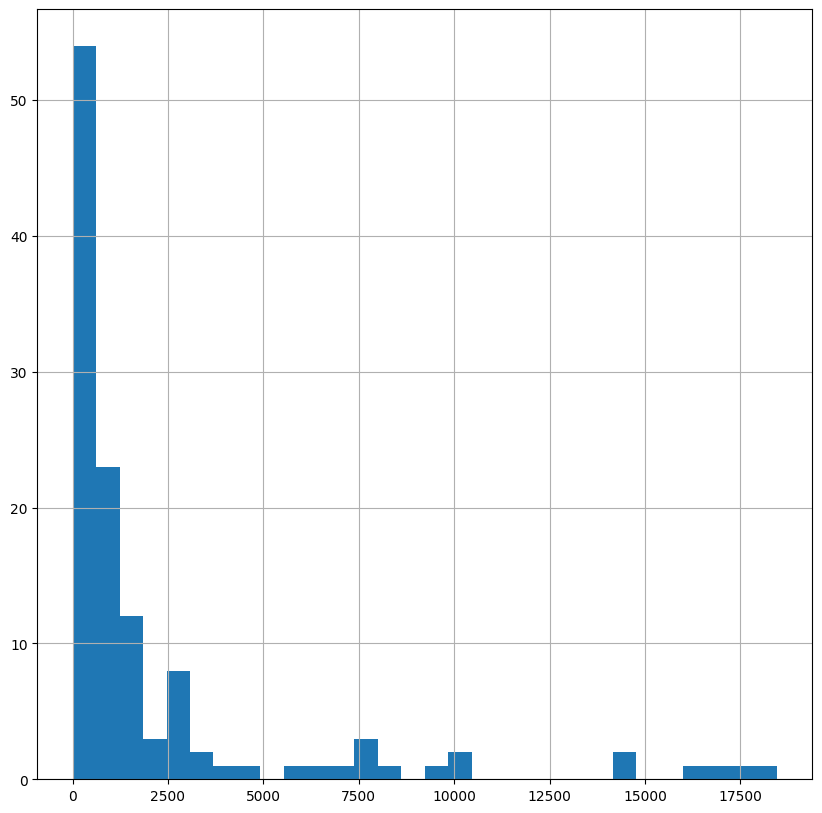

In [59]:
df_dengue_completo['Quantidade'].hist(bins = 30, figsize = (10, 10));

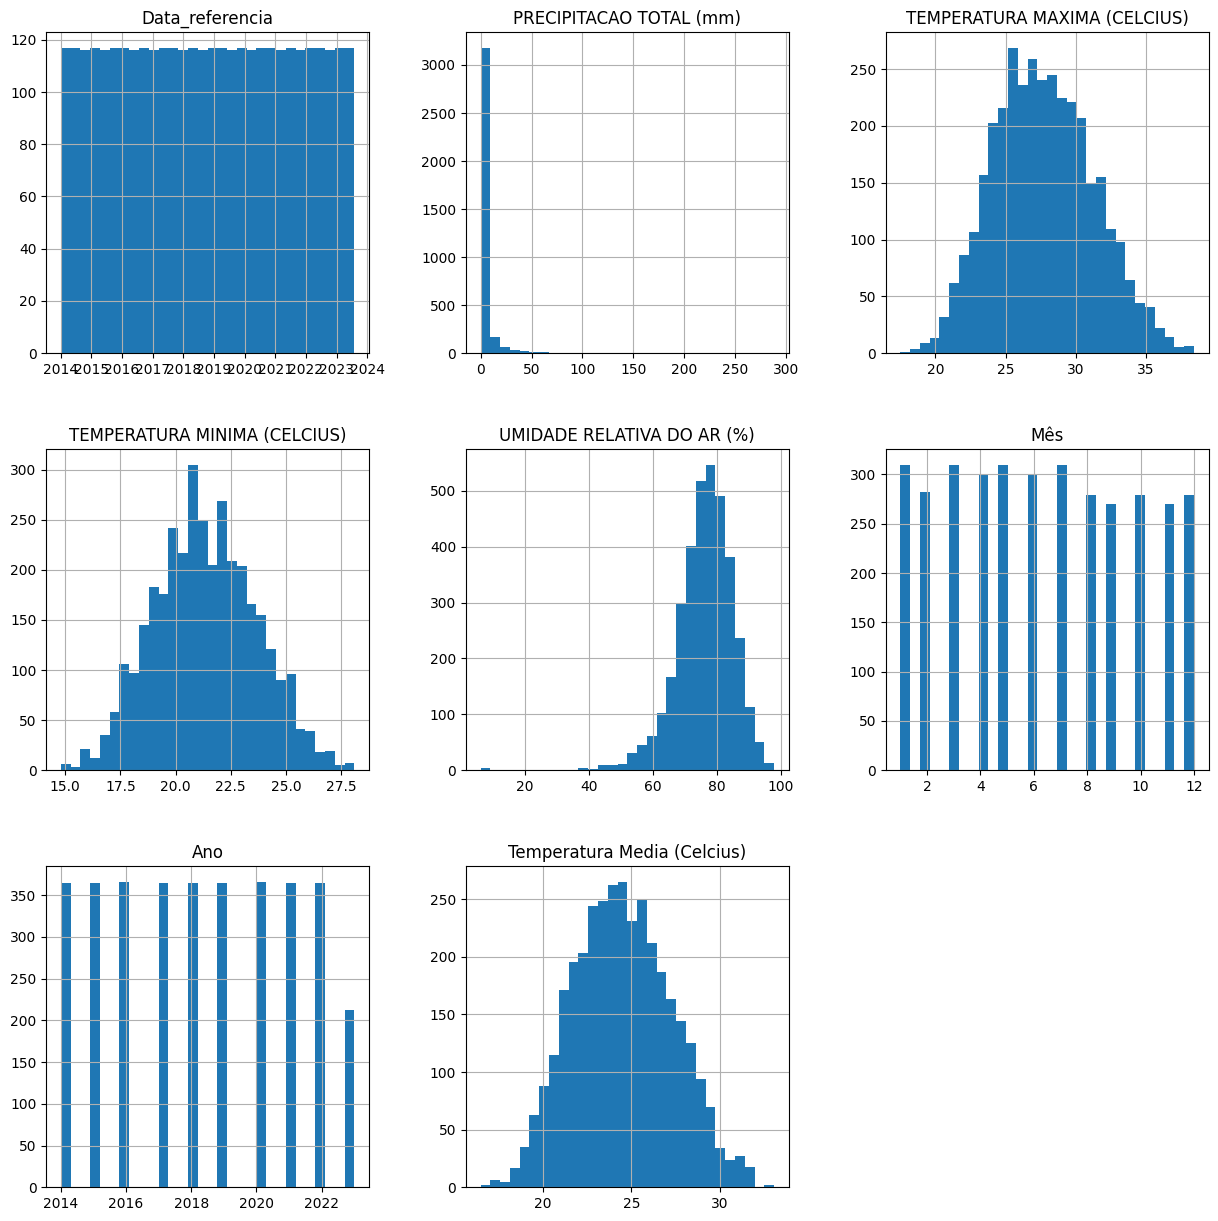

In [60]:
df_clima.hist(bins = 30, figsize = (15, 15));

#### Unificando os dataframes para previsão + EDA

In [61]:
df_dengue_completo.tail(7)

,Data_referencia,Quantidade
113,2023-06-01,5977
114,2023-07-01,1044
115,2023-08-01,0
116,2023-09-01,0
117,2023-10-01,0
118,2023-11-01,0
119,2023-12-01,0


In [62]:
df_dengue_completo.drop(index = range(115, 120), inplace = True)
df_dengue_completo['Mês'] = pd.DatetimeIndex(df_dengue_completo['Data_referencia']).month
df_dengue_completo['Ano'] = pd.DatetimeIndex(df_dengue_completo['Data_referencia']).year
df_dengue_completo.rename(columns = {'Quantidade': 'Quantidade_casos_dengue'}, inplace = True)

In [63]:
df_clima.columns

Index(['Data_referencia', 'PRECIPITACAO TOTAL (mm)',
       'TEMPERATURA MAXIMA (CELCIUS)', 'TEMPERATURA MINIMA (CELCIUS)',
       'UMIDADE RELATIVA DO AR (%)', 'Mês', 'Ano',
       'Temperatura Media (Celcius)'],
      dtype='object')

In [64]:
df_precipitacao_total = df_clima.groupby(['Ano', 'Mês'])['PRECIPITACAO TOTAL (mm)'].sum().round(2).reset_index()
df_temp_maxima_media = df_clima.groupby(['Ano', 'Mês'])['TEMPERATURA MAXIMA (CELCIUS)'].mean().round(2).reset_index()
df_temp_minima_media = df_clima.groupby(['Ano', 'Mês'])['TEMPERATURA MINIMA (CELCIUS)'].mean().round(2).reset_index()
df_temp_umidade_media = df_clima.groupby(['Ano', 'Mês'])['UMIDADE RELATIVA DO AR (%)'].mean().round(2).reset_index()

In [65]:
df_precipitacao_total.columns = ['Ano', 'Mês', 'Precipitacao_total_(mm)']
df_temp_maxima_media.columns = ['Ano', 'Mês', 'Temp_maxima_media_(celcius)']
df_temp_minima_media.columns = ['Ano', 'Mês', 'Temp_minima_media_(celcius)']
df_temp_umidade_media.columns = ['Ano', 'Mês', 'Umidade_relativa_ar_media_(%)']

In [66]:
df_previsao = pd.merge(left = df_precipitacao_total, right = df_temp_maxima_media, how = 'inner')
df_previsao = pd.merge(left = df_previsao, right = df_temp_minima_media, how = 'inner')
df_previsao = pd.merge(left = df_previsao, right = df_temp_umidade_media, how = 'inner')
df_previsao

,Ano,Mês,Precipitacao_total_(mm),Temp_maxima_media_(celcius),Temp_minima_media_(celcius),Umidade_relativa_ar_media_(%)
0,2014,1,49.2,31.97,23.63,73.68
1,2014,2,22.2,30.06,21.34,72.64
2,2014,3,74.6,29.63,22.50,76.77
3,2014,4,122.6,27.59,21.55,80.00
4,2014,5,71.2,26.50,20.66,76.03
...,...,...,...,...,...,...
110,2023,3,90.8,31.17,23.68,67.67
111,2023,4,134.0,28.10,22.27,68.92
112,2023,5,87.2,26.43,20.72,67.72
113,2023,6,20.4,25.89,20.12,63.00


In [67]:
df_previsao = pd.merge(left = df_dengue_completo, right = df_previsao, how = 'left', left_on = ['Ano', 'Mês'], right_on = ['Ano', 'Mês'])

In [68]:
# df_previsao.drop(columns = ['Mês', 'Ano'], inplace = True)
df_previsao.tail(5)

,Data_referencia,Quantidade_casos_dengue,Mês,Ano,Precipitacao_total_(mm),Temp_maxima_media_(celcius),Temp_minima_media_(celcius),Umidade_relativa_ar_media_(%)
110,2023-03-01,6756,3,2023,90.8,31.17,23.68,67.67
111,2023-04-01,7671,4,2023,134.0,28.10,22.27,68.92
112,2023-05-01,7981,5,2023,87.2,26.43,20.72,67.72
113,2023-06-01,5977,6,2023,20.4,25.89,20.12,63.00
114,2023-07-01,1044,7,2023,29.2,25.43,19.34,64.48


In [69]:
df_previsao.describe()

,Data_referencia,Quantidade_casos_dengue,Mês,Ano,Precipitacao_total_(mm),Temp_maxima_media_(celcius),Temp_minima_media_(celcius),Umidade_relativa_ar_media_(%)
count,115,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000
mean,2018-10-01 01:52:41.739130368,2437.843478,6.347826,2018.304348,93.352000,27.712522,21.365739,76.215739
min,2014-01-01 00:00:00,68.000000,1.000000,2014.000000,5.600000,23.040000,18.320000,63.000000
25%,2016-05-16 12:00:00,425.000000,3.000000,2016.000000,45.170000,25.955000,20.045000,74.160000
50%,2018-10-01 00:00:00,833.000000,6.000000,2018.000000,77.000000,27.290000,21.280000,76.520000
75%,2021-02-15 00:00:00,2003.500000,9.000000,2021.000000,119.900000,29.405000,22.715000,78.525000
max,2023-07-01 00:00:00,18464.000000,12.000000,2023.000000,396.200000,34.660000,25.770000,86.520000
std,NaN,3992.667175,3.448985,2.785218,71.694669,2.401674,1.778776,4.132500


In [70]:
df_previsao[df_previsao['Umidade_relativa_ar_media_(%)'] == 128.360000]

,Data_referencia,Quantidade_casos_dengue,Mês,Ano,Precipitacao_total_(mm),Temp_maxima_media_(celcius),Temp_minima_media_(celcius),Umidade_relativa_ar_media_(%)


In [71]:
df_previsao.groupby(['Ano'])['Quantidade_casos_dengue'].sum()

Ano
2014     7860
2015    73666
2016    88616
2017    11035
2018    14917
2019    32276
2020     4581
2021     2848
2022    11085
2023    33468
Name: Quantidade_casos_dengue, dtype: int64

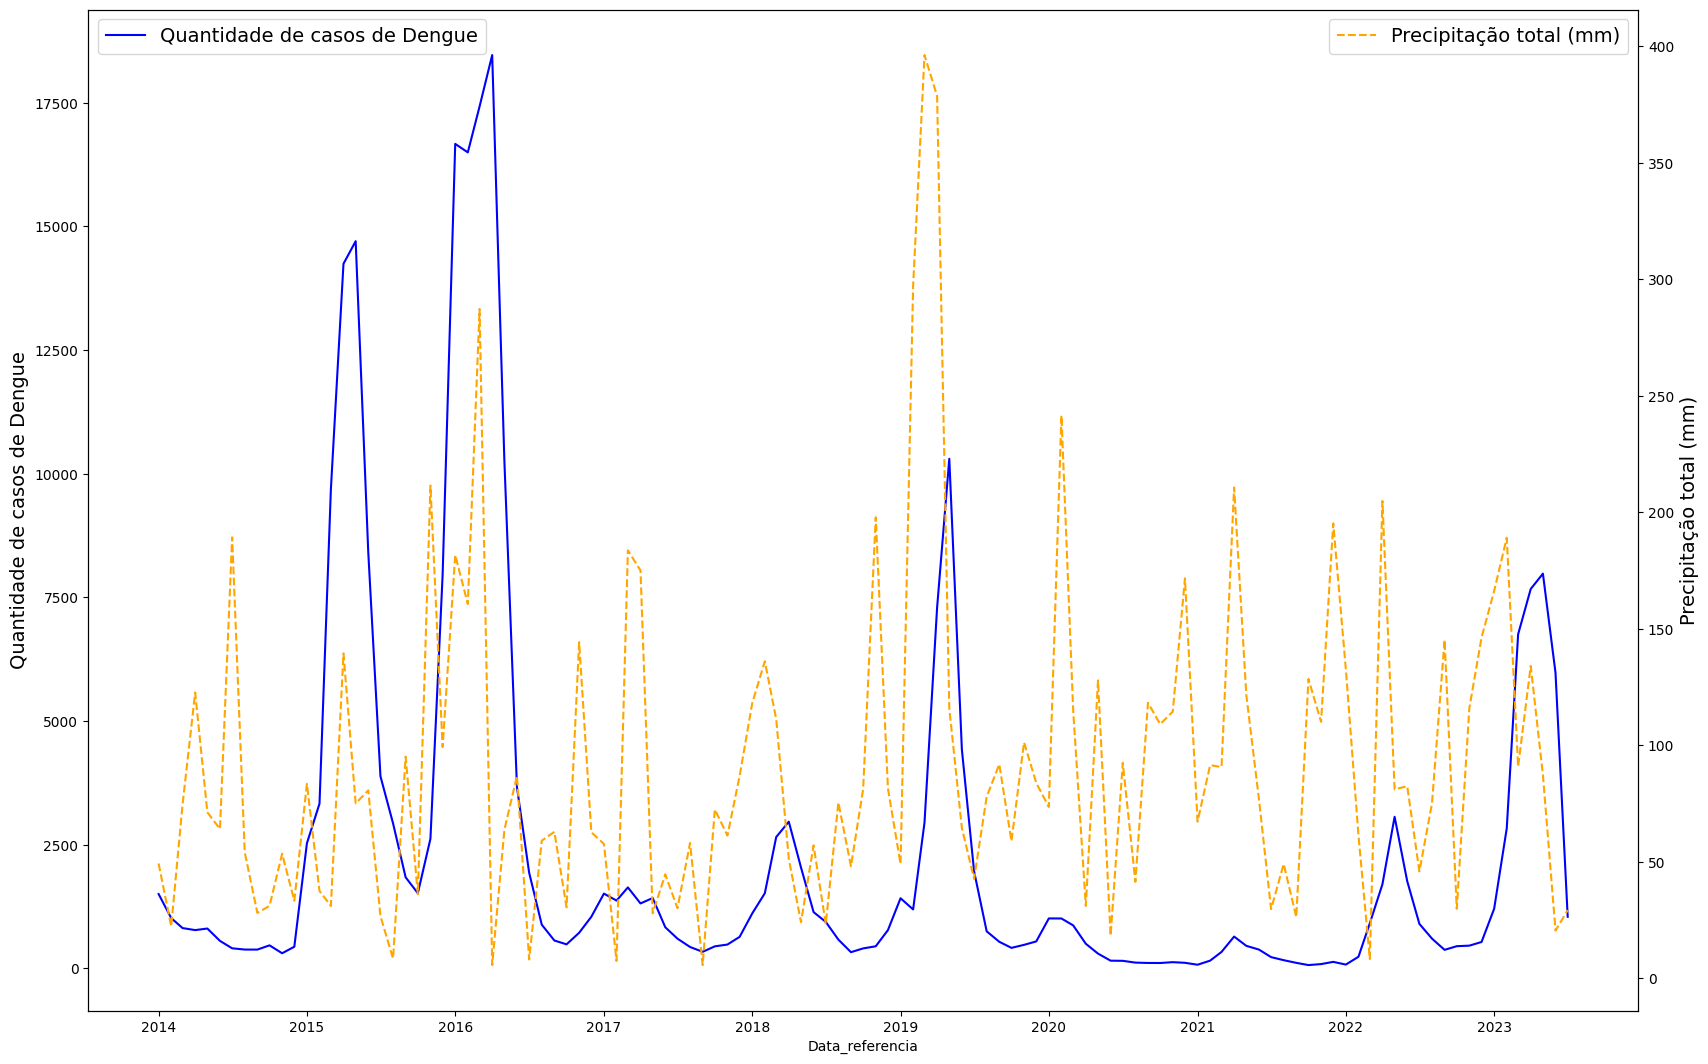

In [72]:
fig, ax = plt.subplots(figsize = (20, 13))
ax = sns.lineplot(data = df_previsao, x = 'Data_referencia', y = 'Quantidade_casos_dengue', color = 'b')
ax.set_ylabel('Quantidade de casos de Dengue')
ax.legend(['Quantidade de casos de Dengue'], loc="upper left", fontsize = 14)
ax.yaxis.label.set_fontsize(14)

ax2 = ax.twinx()
ax = sns.lineplot(data = df_previsao, x = 'Data_referencia', y = 'Precipitacao_total_(mm)', ax = ax2, color = 'orange',
                  linestyle = 'dashed')
ax2.set_ylabel('Precipitação total (mm)')
ax2.legend(['Precipitação total (mm)'], loc="upper right", fontsize = 14)
ax2.yaxis.label.set_fontsize(14)

plt.show()

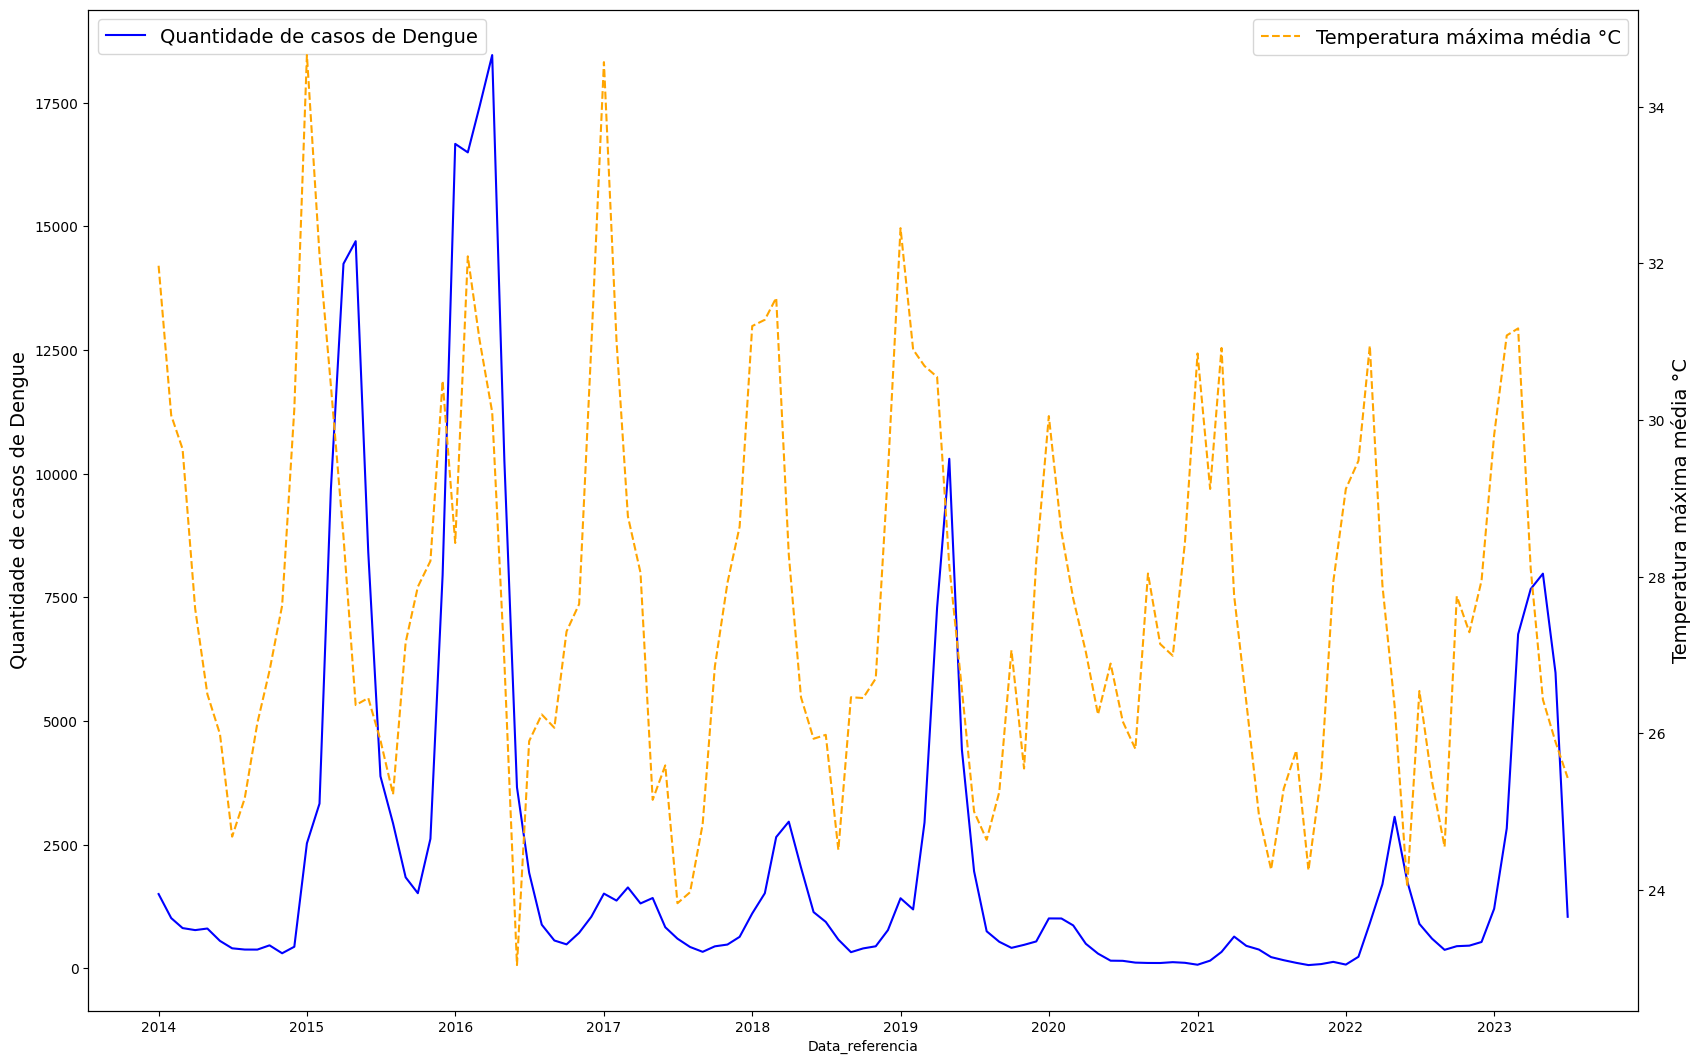

In [73]:
fig, ax = plt.subplots(figsize = (20, 13))
ax = sns.lineplot(data = df_previsao, x = 'Data_referencia', y = 'Quantidade_casos_dengue', color = 'b')
ax.set_ylabel('Quantidade de casos de Dengue')
ax.legend(['Quantidade de casos de Dengue'], loc="upper left", fontsize = 14)
ax.yaxis.label.set_fontsize(14)

ax2 = ax.twinx()
ax = sns.lineplot(data = df_previsao, x = 'Data_referencia', y = 'Temp_maxima_media_(celcius)', ax = ax2, color = 'orange',
                  linestyle = 'dashed')
ax2.set_ylabel('Temperatura máxima média °C')
ax2.legend(['Temperatura máxima média °C'], loc="upper right", fontsize = 14)
ax2.yaxis.label.set_fontsize(14)

plt.show()

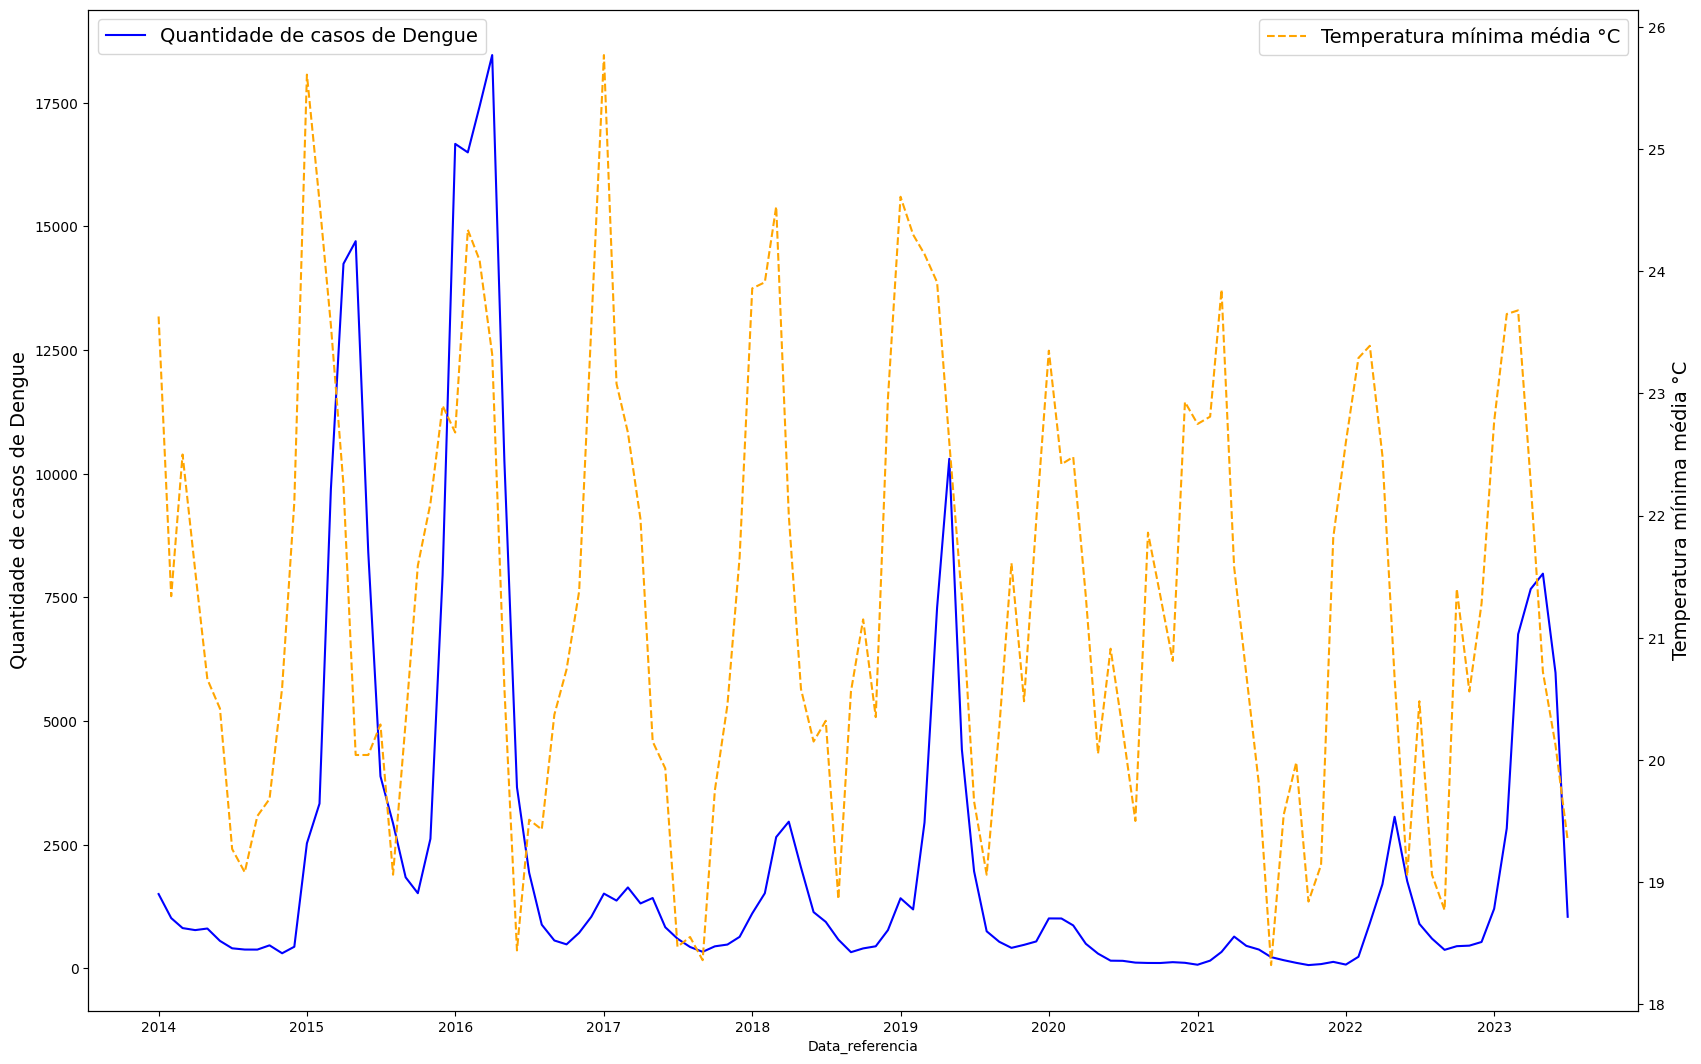

In [74]:
fig, ax = plt.subplots(figsize = (20, 13))
ax = sns.lineplot(data = df_previsao, x = 'Data_referencia', y = 'Quantidade_casos_dengue', color = 'b')
ax.set_ylabel('Quantidade de casos de Dengue')
ax.legend(['Quantidade de casos de Dengue'], loc="upper left", fontsize = 14)
ax.yaxis.label.set_fontsize(14)

ax2 = ax.twinx()
ax = sns.lineplot(data = df_previsao, x = 'Data_referencia', y = 'Temp_minima_media_(celcius)', ax = ax2, color = 'orange',
                  linestyle = 'dashed')
ax2.set_ylabel('Temperatura mínima média °C')
ax2.legend(['Temperatura mínima média °C'], loc="upper right", fontsize = 14)
ax2.yaxis.label.set_fontsize(14)

plt.show()

In [75]:
df_previsao.columns

Index(['Data_referencia', 'Quantidade_casos_dengue', 'Mês', 'Ano',
       'Precipitacao_total_(mm)', 'Temp_maxima_media_(celcius)',
       'Temp_minima_media_(celcius)', 'Umidade_relativa_ar_media_(%)'],
      dtype='object')

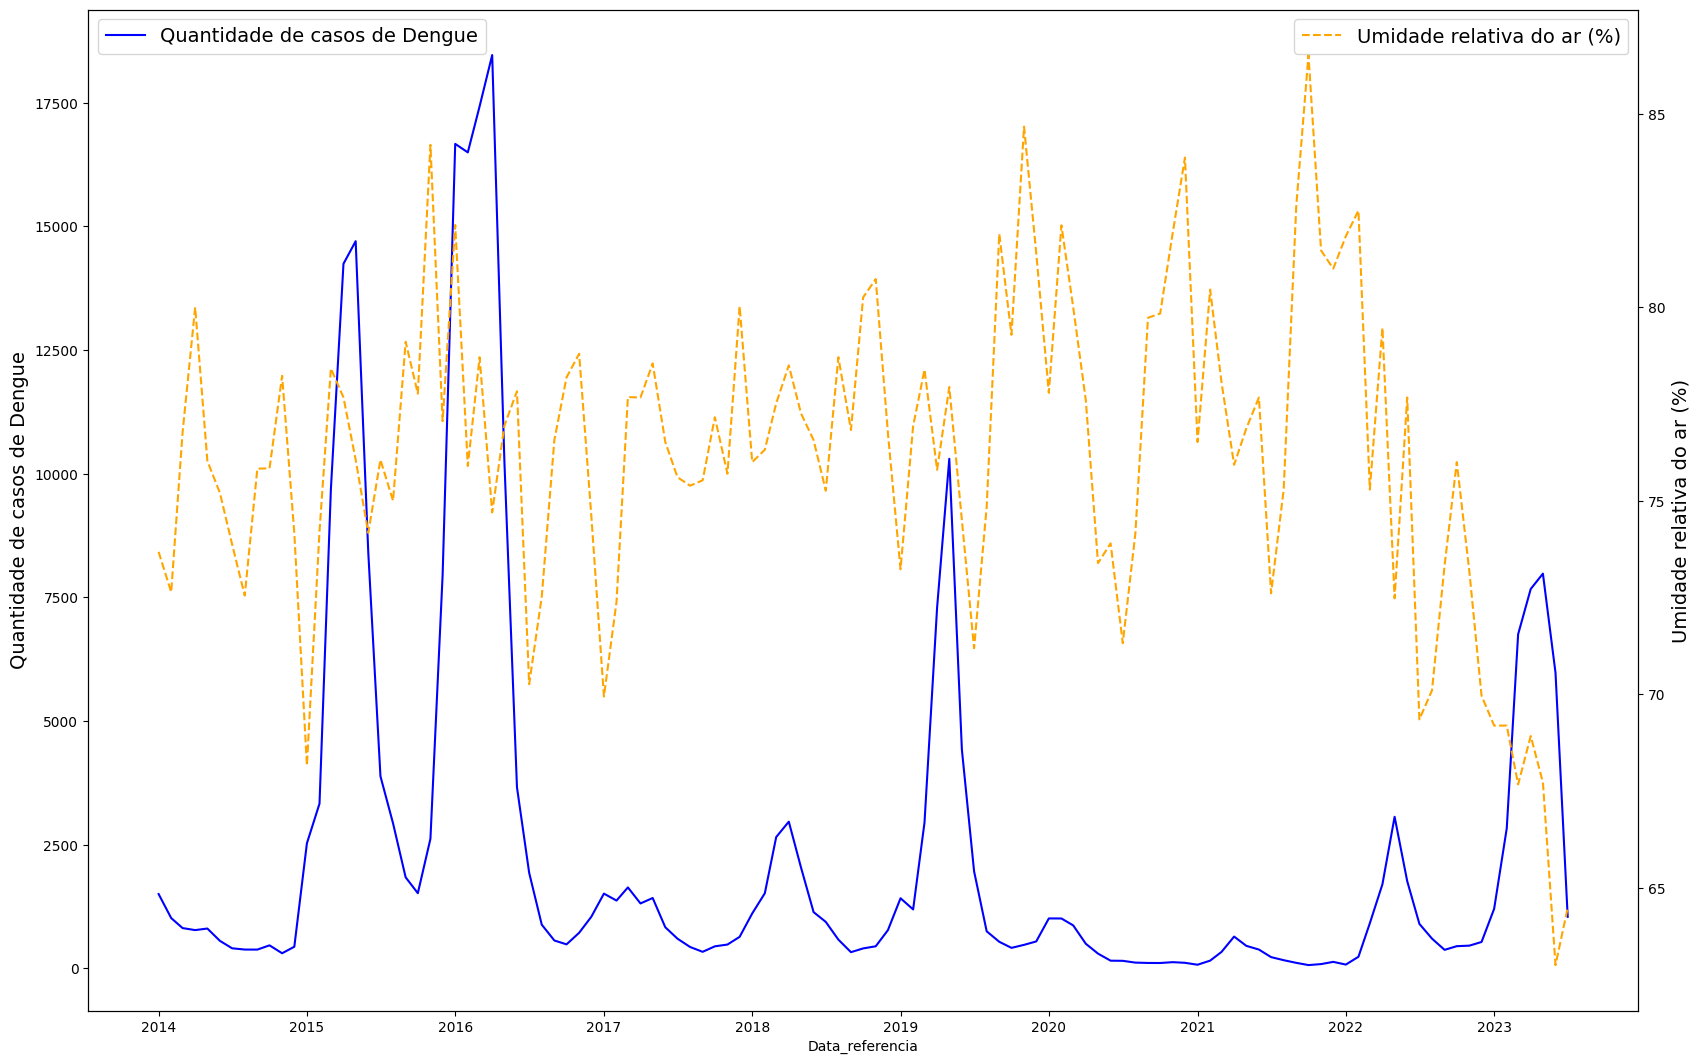

In [76]:
fig, ax = plt.subplots(figsize = (20, 13))
ax = sns.lineplot(data = df_previsao, x = 'Data_referencia', y = 'Quantidade_casos_dengue', color = 'b')
ax.set_ylabel('Quantidade de casos de Dengue')
ax.legend(['Quantidade de casos de Dengue'], loc="upper left", fontsize = 14)
ax.yaxis.label.set_fontsize(14)

ax2 = ax.twinx()
ax = sns.lineplot(data = df_previsao, x = 'Data_referencia', y = 'Umidade_relativa_ar_media_(%)', ax = ax2, color = 'orange',
                linestyle = 'dashed')
ax2.set_ylabel('Umidade relativa do ar (%)')
ax2.legend(['Umidade relativa do ar (%)'], loc="upper right", fontsize = 14)
ax2.yaxis.label.set_fontsize(14)

plt.show()

In [79]:
df_previsao.to_excel('previsao_dengue.xlsx', sheet_name = 'Casos Dengue')

### Previsão utilizando Prophet

In [ ]:
df_previsao.columns

Index(['Data_referencia', 'Quantidade_casos_dengue', 'Mês', 'Ano',
       'Precipitacao_total_(mm)', 'Temp_maxima_media_(celcius)',
       'Temp_minima_media_(celcius)', 'Umidade_relativa_ar_media_(%)'],
      dtype='object')

In [6]:
from prophet import Prophet

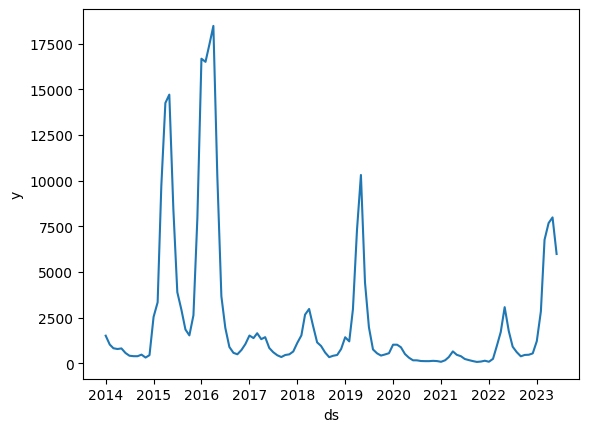

In [ ]:
df_previsao_prophet = df_previsao[['Data_referencia', 'Quantidade_casos_dengue']].rename(columns = {'Data_referencia': 'ds', 'Quantidade_casos_dengue': 'y'}).sort_values(by = 'ds')
df_previsao_prophet.drop(df_previsao_prophet.tail(1).index, inplace = True)
sns.lineplot(data = df_previsao_prophet, x = 'ds', y = 'y');

19:52:52 - cmdstanpy - INFO - Chain [1] start processing
19:52:52 - cmdstanpy - INFO - Chain [1] done processing


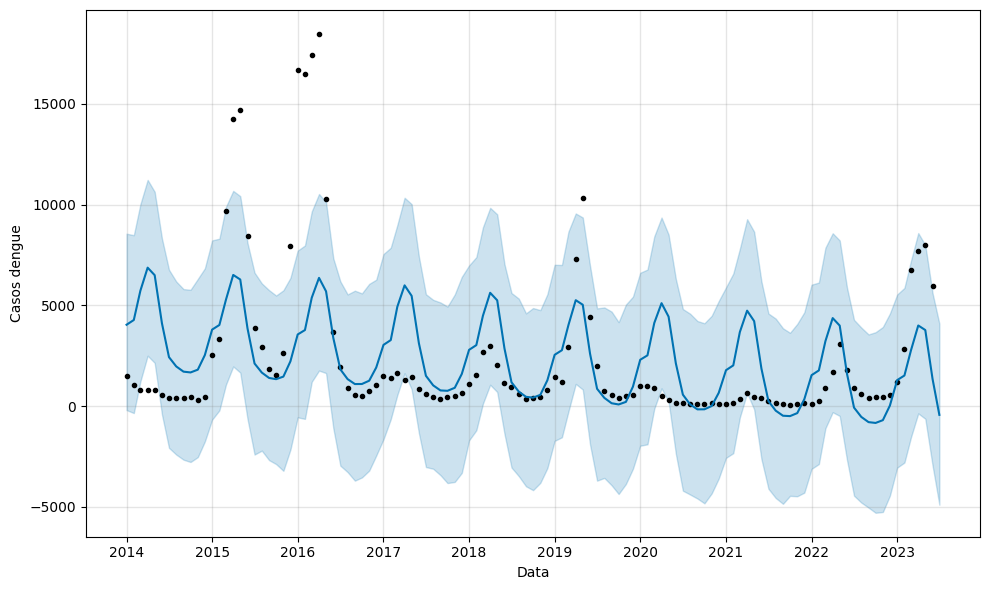

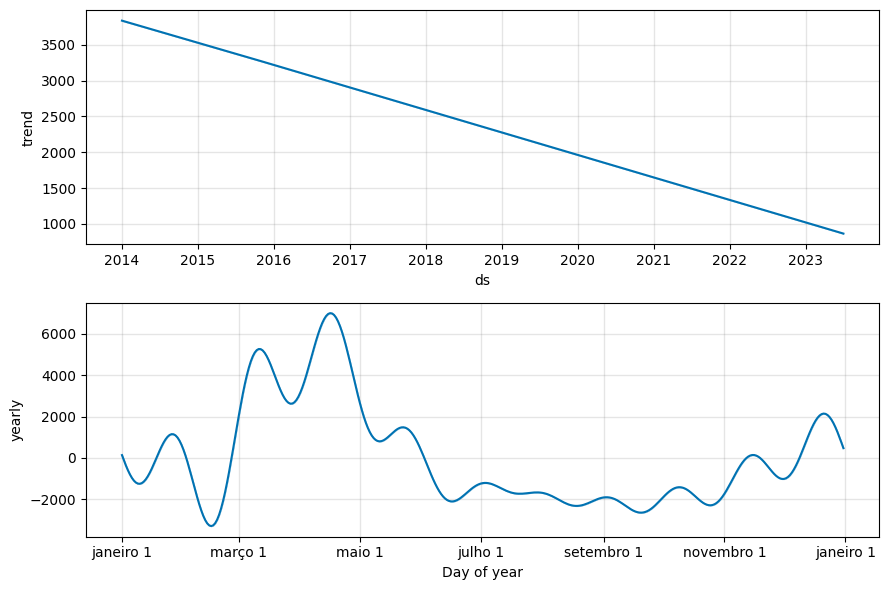

In [ ]:
modelo = Prophet()
modelo.fit(df_previsao_prophet)
previsao_futura = modelo.make_future_dataframe(periods = 1, freq = 'M')
previsao = modelo.predict(previsao_futura)
figura_1 = modelo.plot(previsao, xlabel = 'Data', ylabel = 'Casos dengue')
figura_2 = modelo.plot_components(previsao)

In [ ]:
df_previsao.tail(1)[['Data_referencia', 'Quantidade_casos_dengue']]

,Data_referencia,Quantidade_casos_dengue
114,2023-07-01,1044


In [ ]:
previsao.tail(1)[['ds', 'yhat']]

,ds,yhat
114,2023-06-30,-440.092044


### Previsão utilizando o AutoTS

In [ ]:
df_previsao_autots = df_previsao.drop(columns = ['Ano', 'Mês'])
df_previsao_autots = df_previsao_autots.set_index(df_previsao_autots['Data_referencia'])
df_previsao_autots = df_previsao_autots.drop(columns = ['Data_referencia'])
df_previsao_autots.head(5)

,Quantidade_casos_dengue,Precipitacao_total_(mm),Temp_maxima_media_(celcius),Temp_minima_media_(celcius),Umidade_relativa_ar_media_(%)
Data_referencia,,,,,
2014-01-01,1504,49.2,31.97,23.63,73.68
2014-02-01,1018,22.2,30.06,21.34,72.64
2014-03-01,816,74.6,29.63,22.50,76.77
2014-04-01,775,122.6,27.59,21.55,80.00
2014-05-01,807,71.2,26.50,20.66,76.03


In [7]:
from autots import AutoTS

In [ ]:
from autots.models.model_list import model_lists
print(model_lists.keys())

dict_keys(['all', 'default', 'fast', 'superfast', 'parallel', 'fast_parallel', 'fast_parallel_no_arima', 'scalable', 'probabilistic', 'multivariate', 'univariate', 'no_params', 'recombination_approved', 'no_shared', 'no_shared_fast', 'experimental', 'slow', 'gpu', 'regressor', 'best', 'motifs', 'all_result_path', 'regressions', 'all_pragmatic', 'update_fit'])


In [ ]:
print(model_lists['multivariate'])

['VECM', 'DynamicFactor', 'GluonTS', 'RollingRegression', 'WindowRegression', 'VAR', 'MultivariateMotif', 'NVAR', 'MultivariateRegression', 'SectionalMotif', 'DynamicFactorMQ', 'PytorchForecasting', 'RRVAR', 'MAR', 'TMF', 'LATC', 'Cassandra', 'BallTreeMultivariateMotif', 'TiDE']


In [ ]:
modelo = AutoTS(
    forecast_length = 1,
    frequency = 'M',
    prediction_interval = .95,
    ensemble = None,
    models_mode = 'deep',
    model_list = 'multivariate',
    max_generations = 10,
    num_validations = 3,
    no_negatives = True,
    n_jobs = 'auto')

Using 3 cpus for n_jobs.



In [ ]:
modelo.fit(df_previsao_autots['Quantidade_casos_dengue'])
previsao = modelo.predict()

Data frequency is: MS, used frequency is: M
Model Number: 1 with model GluonTS in generation 0 of 10
Template Eval Error: ImportError('GluonTS installation is incompatible with AutoTS. The numpy version is sometimes the issue, try 1.23.1 {as of 06-2023}') in model 1 in generation 0: GluonTS
Model Number: 2 with model GluonTS in generation 0 of 10
Template Eval Error: ImportError('GluonTS installation is incompatible with AutoTS. The numpy version is sometimes the issue, try 1.23.1 {as of 06-2023}') in model 2 in generation 0: GluonTS
Model Number: 3 with model GluonTS in generation 0 of 10
Template Eval Error: ImportError('GluonTS installation is incompatible with AutoTS. The numpy version is sometimes the issue, try 1.23.1 {as of 06-2023}') in model 3 in generation 0: GluonTS
Model Number: 4 with model GluonTS in generation 0 of 10
Template Eval Error: ImportError('GluonTS installation is incompatible with AutoTS. The numpy version is sometimes the issue, try 1.23.1 {as of 06-2023}') 

100%|██████████| 18/18 [00:02<00:00,  6.15it/s]


Template Eval Error: ZeroDivisionError('division by zero') in model 44 in generation 0: TiDE
Model Number: 45 with model MultivariateRegression in generation 0 of 10
Template Eval Error: ValueError("regression_type='User' but not future_regressor supplied.") in model 45 in generation 0: MultivariateRegression
Model Number: 46 with model LATC in generation 0 of 10
Model Number: 47 with model MAR in generation 0 of 10
Model Number: 48 with model DynamicFactor in generation 0 of 10
Template Eval Error: ValueError('The dynamic factors model is only valid for multivariate time series.') in model 48 in generation 0: DynamicFactor
Model Number: 49 with model RRVAR in generation 0 of 10
Template Eval Error: Exception('Transformer AlignLastValue failed on inverse') in model 49 in generation 0: RRVAR
Model Number: 50 with model TMF in generation 0 of 10
Template Eval Error: Exception('Transformer HolidayTransformer failed on fit') in model 50 in generation 0: TMF
Model Number: 51 with model LATC

100%|██████████| 18/18 [00:02<00:00,  7.74it/s]


Template Eval Error: ZeroDivisionError('division by zero') in model 116 in generation 0: TiDE
Model Number: 117 with model PytorchForecasting in generation 0 of 10
Template Eval Error: ImportError('pytorch, pytorch lighting, or pytorch-forecasting not present') in model 117 in generation 0: PytorchForecasting
Model Number: 118 with model BallTreeMultivariateMotif in generation 0 of 10
Template Eval Error: ValueError("Unrecognized metric '['euclidean']'") in model 118 in generation 0: BallTreeMultivariateMotif
Model Number: 119 with model Cassandra in generation 0 of 10
Model Number: 120 with model TMF in generation 0 of 10
Template Eval Error: LinAlgError('SVD did not converge') in model 120 in generation 0: TMF
New Generation: 1 of 10
Model Number: 121 with model MultivariateMotif in generation 1 of 10
Model Number: 122 with model MultivariateMotif in generation 1 of 10
Model Number: 123 with model MultivariateMotif in generation 1 of 10
Model Number: 124 with model RRVAR in generatio

In [ ]:
# Salvando modelo

# modelo.export_template(
#     'modelo.csv',
#     models = 'best',
#     max_per_model_class = 1,
#     include_results = True
#     )

In [ ]:
previsao_max, previsao_min = previsao.upper_forecast, previsao.lower_forecast
print('Modelo com 10 gerações e multivariáveis, seleção automática do melhor modelo')
print('\n Resultado previsto \n' , previsao.forecast)
print('\n \n Valor mínimo previsto \n', previsao_min)
print('\n \n Valor máximo previsto \n', previsao_max)


Modelo com 10 gerações e multivariáveis, seleção automática do melhor modelo

 Resultado previsto 
             Quantidade_casos_dengue
2023-08-31                      0.0

 
 Valor mínimo previsto 
             Quantidade_casos_dengue
2023-08-31                      0.0

 
 Valor máximo previsto 
             Quantidade_casos_dengue
2023-08-31                      0.0


In [ ]:
modelo.results('validation')

,ID,Model,ModelParameters,TransformationParameters,Ensemble,Runs,smape,mae,rmse,made,...,wasserstein_weighted,dwd_weighted,containment_weighted,contour_weighted,TotalRuntimeSeconds,Score,lowest_series_mape,lowest_series_mape_name,highest_series_mape,highest_series_mape_name
0,000684c615910b7143428b93f01b2318,WindowRegression,"{""window_size"": 20, ""input_dim"": ""univariate"",...","{""fillna"": ""mean"", ""transformations"": {""0"": ""c...",0,1,117.494071,2973.454402,2973.454402,2.940368,...,2.940368,2.940368,0.0,1.0,0.152000,3115.815977,121.970686,Quantidade_casos_dengue,121.970686,Quantidade_casos_dengue
1,001f028686b062d7d37ac7c2e9f8d3c5,NVAR,"{""k"": 1, ""ridge_param"": 0.002, ""warmup_pts"": 1...","{""fillna"": ""ffill"", ""transformations"": {""0"": ""...",0,1,128.053633,3716.323689,3716.323689,3.674971,...,3.674971,3.674971,0.0,1.0,0.030000,4150.157972,152.443080,Quantidade_casos_dengue,152.443080,Quantidade_casos_dengue
2,00a9d4d04b76ce274a97f74f0a555dda,MultivariateMotif,"{""window"": 28, ""point_method"": ""median"", ""dist...","{""fillna"": ""ffill"", ""transformations"": {""0"": ""...",0,1,87.510467,1624.345383,1624.345383,1.606271,...,1.606271,1.606271,1.0,1.0,0.019600,1790.711327,66.630421,Quantidade_casos_dengue,66.630421,Quantidade_casos_dengue
3,023340502729ba2d761afa39d7d434b6,MultivariateMotif,"{""window"": 14, ""point_method"": ""median"", ""dist...","{""fillna"": ""mean"", ""transformations"": {""0"": ""b...",0,1,153.911658,6972.859634,6972.859634,6.895270,...,6.895270,2.860947,0.0,0.0,0.031100,7623.449007,286.025731,Quantidade_casos_dengue,286.025731,Quantidade_casos_dengue
4,028f231a7807a2eaa7aa0100287f7fb3,NVAR,"{""k"": 1, ""ridge_param"": 0.002, ""warmup_pts"": 1...","{""fillna"": ""quadratic"", ""transformations"": {""0...",0,1,64.471184,509.000000,509.000000,0.503336,...,0.503336,0.503336,0.0,1.0,0.040000,1084.913376,20.879109,Quantidade_casos_dengue,20.879109,Quantidade_casos_dengue
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
674,fd89d6ba065b0ae2a1e4fe2d4d9ff008,RRVAR,"{""method"": ""dmd"", ""rank"": 1, ""maxiter"": 200}","{""fillna"": ""pchip"", ""transformations"": {""0"": ""...",0,1,117.608520,2980.485230,2980.485230,2.947320,...,2.947320,2.947320,0.0,1.0,0.025000,3540.383670,122.259089,Quantidade_casos_dengue,122.259089,Quantidade_casos_dengue
675,fd90176f53f2a1a600bd2c871137deaa,MAR,"{""seasonality"": 7, ""family"": ""gaussian"", ""maxi...","{""fillna"": ""pad"", ""transformations"": {""0"": ""Ro...",0,1,200.000000,1044.000000,1044.000000,1.032383,...,1.032383,1.032383,0.0,1.0,0.157000,2474.960182,42.824735,Quantidade_casos_dengue,42.824735,Quantidade_casos_dengue
676,fefb09d9c5a2c7fc349e5741e94dca86,NVAR,"{""k"": 1, ""ridge_param"": 2e-06, ""warmup_pts"": 1...","{""fillna"": ""pchip"", ""transformations"": {""0"": ""...",0,1,200.000000,1044.000000,1044.000000,1.032383,...,1.032383,1.032383,0.0,1.0,0.024000,2474.948317,42.824735,Quantidade_casos_dengue,42.824735,Quantidade_casos_dengue
677,ff25668ce1ee82c8b48a28b4b70b0c3e,LATC,"{""time_horizon"": 1, ""seasonality"": 2, ""time_la...","{""fillna"": ""pchip"", ""transformations"": {""0"": ""...",0,4,110.388155,4511.475000,4511.475000,4.247809,...,4.247809,3.674854,1.0,0.5,0.026375,3849.290857,273.932681,Quantidade_casos_dengue,273.932681,Quantidade_casos_dengue


In [ ]:
previsao.forecast

,Quantidade_casos_dengue
2023-08-31,0.0


In [ ]:
df_previsao_autots_2 = df_previsao_autots.drop(df_previsao_autots.tail(1).index)
df_previsao_autots_2.tail(2)

,Quantidade_casos_dengue,Precipitacao_total_(mm),Temp_maxima_media_(celcius),Temp_minima_media_(celcius),Umidade_relativa_ar_media_(%)
Data_referencia,,,,,
2023-05-01,7981,87.2,26.43,20.72,67.72
2023-06-01,5977,20.4,25.89,20.12,63.00


In [ ]:
modelo.fit(df_previsao_autots_2['Quantidade_casos_dengue'])
previsao_2 = modelo.predict()

Data frequency is: MS, used frequency is: M
Model Number: 1169 with model GluonTS in generation 0 of 10
Template Eval Error: ImportError('GluonTS installation is incompatible with AutoTS. The numpy version is sometimes the issue, try 1.23.1 {as of 06-2023}') in model 1169 in generation 0: GluonTS
Model Number: 1170 with model GluonTS in generation 0 of 10
Template Eval Error: ImportError('GluonTS installation is incompatible with AutoTS. The numpy version is sometimes the issue, try 1.23.1 {as of 06-2023}') in model 1170 in generation 0: GluonTS
Model Number: 1171 with model GluonTS in generation 0 of 10
Template Eval Error: ImportError('GluonTS installation is incompatible with AutoTS. The numpy version is sometimes the issue, try 1.23.1 {as of 06-2023}') in model 1171 in generation 0: GluonTS
Model Number: 1172 with model GluonTS in generation 0 of 10
Template Eval Error: ImportError('GluonTS installation is incompatible with AutoTS. The numpy version is sometimes the issue, try 1.23

100%|██████████| 18/18 [00:02<00:00,  7.83it/s]


Template Eval Error: ZeroDivisionError('division by zero') in model 1212 in generation 0: TiDE
Model Number: 1213 with model MultivariateRegression in generation 0 of 10
Template Eval Error: ValueError("regression_type='User' but not future_regressor supplied.") in model 1213 in generation 0: MultivariateRegression
Model Number: 1214 with model LATC in generation 0 of 10
Model Number: 1215 with model MAR in generation 0 of 10
Model Number: 1216 with model DynamicFactor in generation 0 of 10
Template Eval Error: ValueError('The dynamic factors model is only valid for multivariate time series.') in model 1216 in generation 0: DynamicFactor
Model Number: 1217 with model RRVAR in generation 0 of 10
Template Eval Error: Exception('Transformer AlignLastValue failed on inverse') in model 1217 in generation 0: RRVAR
Model Number: 1218 with model TMF in generation 0 of 10
Template Eval Error: Exception('Transformer HolidayTransformer failed on fit') in model 1218 in generation 0: TMF
Model Numb

100%|██████████| 18/18 [00:02<00:00,  8.59it/s]


Template Eval Error: ZeroDivisionError('division by zero') in model 1284 in generation 0: TiDE
Model Number: 1285 with model PytorchForecasting in generation 0 of 10
Template Eval Error: ImportError('pytorch, pytorch lighting, or pytorch-forecasting not present') in model 1285 in generation 0: PytorchForecasting
Model Number: 1286 with model BallTreeMultivariateMotif in generation 0 of 10
Template Eval Error: ValueError("Unrecognized metric '['euclidean']'") in model 1286 in generation 0: BallTreeMultivariateMotif
Model Number: 1287 with model Cassandra in generation 0 of 10
Model Number: 1288 with model TMF in generation 0 of 10
Template Eval Error: LinAlgError('SVD did not converge') in model 1288 in generation 0: TMF
New Generation: 1 of 10
Model Number: 1289 with model WindowRegression in generation 1 of 10
Model Number: 1290 with model LATC in generation 1 of 10
Model Number: 1291 with model RRVAR in generation 1 of 10
Model Number: 1292 with model MultivariateRegression in genera

In [ ]:
print(modelo)

Initiated AutoTS object with best model: 
RollingRegression
{'fillna': 'akima', 'transformations': {'0': 'DifferencedTransformer'}, 'transformation_params': {'0': {}}}
{'regression_model': {'model': 'BayesianRidge', 'model_params': {}}, 'holiday': False, 'mean_rolling_periods': 12, 'macd_periods': 24, 'std_rolling_periods': 10, 'max_rolling_periods': 4, 'min_rolling_periods': 2, 'ewm_var_alpha': None, 'quantile90_rolling_periods': None, 'quantile10_rolling_periods': None, 'ewm_alpha': 0.2, 'additional_lag_periods': 68, 'abs_energy': False, 'rolling_autocorr_periods': None, 'nonzero_last_n': None, 'add_date_part': None, 'polynomial_degree': None, 'x_transform': None, 'regression_type': None}
Validation: 0, 1, 2, 3
SMAPE: 15.65423313234851, 14.96585479070025, 10.846152051319864, 59.16526086499846
MAE: 1015.1071328827529, 1111.2693892792686, 879.7159908504545, 3084.6765578828686
SPL: 0.3746704265016087, 0.37456275030977293, 0.37178444119659687, 0.36126853930559977


In [ ]:
previsao_max, previsao_min = previsao_2.upper_forecast, previsao_2.lower_forecast

print('Modelo com 10 gerações e multivariáveis, seleção automática do melhor modelo')
print('\n Resultado previsto \n' , previsao_2.forecast)
print('\n \n Valor mínimo previsto \n', previsao_min)
print('\n \n Valor máximo previsto \n', previsao_max)
print('\n \n Resultado real:', df_previsao_autots.Quantidade_casos_dengue.values[-1])

Modelo com 10 gerações e multivariáveis, seleção automática do melhor modelo

 Resultado previsto 
             Quantidade_casos_dengue
2023-07-31              4028.423602

 
 Valor mínimo previsto 
             Quantidade_casos_dengue
2023-07-31               404.946553

 
 Valor máximo previsto 
             Quantidade_casos_dengue
2023-07-31              8313.084011

 
 Resultado real: 1044


In [ ]:
modelo_2 = AutoTS(
    forecast_length = 1,
    frequency = 'M',
    prediction_interval = .95,
    ensemble = None,
    models_mode = 'deep',
    model_list = 'multivariate',
    max_generations = 20,
    num_validations = 3,
    no_negatives = True,
    n_jobs = 'auto')

Using 3 cpus for n_jobs.


In [ ]:
modelo_2.fit(df_previsao_autots_2['Quantidade_casos_dengue'])
previsao_3 = modelo_2.predict()

Data frequency is: MS, used frequency is: M
Model Number: 1 with model GluonTS in generation 0 of 20
Template Eval Error: ImportError('GluonTS installation is incompatible with AutoTS. The numpy version is sometimes the issue, try 1.23.1 {as of 06-2023}') in model 1 in generation 0: GluonTS
Model Number: 2 with model GluonTS in generation 0 of 20
Template Eval Error: ImportError('GluonTS installation is incompatible with AutoTS. The numpy version is sometimes the issue, try 1.23.1 {as of 06-2023}') in model 2 in generation 0: GluonTS
Model Number: 3 with model GluonTS in generation 0 of 20
Template Eval Error: ImportError('GluonTS installation is incompatible with AutoTS. The numpy version is sometimes the issue, try 1.23.1 {as of 06-2023}') in model 3 in generation 0: GluonTS
Model Number: 4 with model GluonTS in generation 0 of 20
Template Eval Error: ImportError('GluonTS installation is incompatible with AutoTS. The numpy version is sometimes the issue, try 1.23.1 {as of 06-2023}') 

In [ ]:
print(modelo_2)

Initiated AutoTS object with best model: 
RollingRegression
{'fillna': 'rolling_mean', 'transformations': {'0': 'AlignLastValue'}, 'transformation_params': {'0': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 0.5, 'first_value_only': False}}}
{'regression_model': {'model': 'RANSAC', 'model_params': {}}, 'holiday': False, 'mean_rolling_periods': 30, 'macd_periods': 4, 'std_rolling_periods': None, 'max_rolling_periods': 28, 'min_rolling_periods': 18, 'ewm_var_alpha': None, 'quantile90_rolling_periods': None, 'quantile10_rolling_periods': None, 'ewm_alpha': None, 'additional_lag_periods': 27, 'abs_energy': False, 'rolling_autocorr_periods': None, 'nonzero_last_n': None, 'add_date_part': 'recurring', 'polynomial_degree': None, 'x_transform': None, 'regression_type': None}
Validation: 0, 1, 2, 3
SMAPE: 2.540247456183032, 1.8723576285458339, 5.620293386923191, 79.62970322605413
MAE: 153.78383543995187, 148.04687881954214, 419.3484005001392, 3847.7906230177355
SPL: 0.6484049637111844

In [ ]:
previsao_max, previsao_min = previsao_3.upper_forecast, previsao_3.lower_forecast

print('Modelo com 20 gerações e multivariáveis, seleção automática do melhor modelo')
print('\n Resultado previsto \n' , previsao_3.forecast)
print('\n \n Valor mínimo previsto \n', previsao_min)
print('\n \n Valor máximo previsto \n', previsao_max)
print('\n \n Resultado real:', df_previsao_autots.Quantidade_casos_dengue.values[-1])

Modelo com 10 gerações e multivariáveis, seleção automática do melhor modelo

 Resultado previsto 
             Quantidade_casos_dengue
2023-07-31              6020.889846

 
 Valor mínimo previsto 
             Quantidade_casos_dengue
2023-07-31                      0.0

 
 Valor máximo previsto 
             Quantidade_casos_dengue
2023-07-31             13274.232519

 
 Resultado real: 1044


In [ ]:
modelo_3 = AutoTS(
    forecast_length = 1,
    frequency = 'M',
    prediction_interval = .95,
    ensemble = None,
    models_mode = 'deep',
    model_list = 'all',
    max_generations = 10,
    num_validations = 3,
    no_negatives = True,
    n_jobs = 'auto')

Using 3 cpus for n_jobs.


In [ ]:
modelo_3.fit(df_previsao_autots_2['Quantidade_casos_dengue'])
previsao_4 = modelo_3.predict()

Data frequency is: MS, used frequency is: M
Model Number: 1 with model ARIMA in generation 0 of 10
Model Number: 2 with model AverageValueNaive in generation 0 of 10
Model Number: 3 with model AverageValueNaive in generation 0 of 10
Model Number: 4 with model AverageValueNaive in generation 0 of 10
Model Number: 5 with model DatepartRegression in generation 0 of 10
Model Number: 6 with model DatepartRegression in generation 0 of 10
Model Number: 7 with model DatepartRegression in generation 0 of 10
Model Number: 8 with model DatepartRegression in generation 0 of 10
Epoch 1/50
4/4 [==============================] - 16s 13ms/step - loss: 0.3869
Epoch 2/50
4/4 [==============================] - 0s 8ms/step - loss: 0.3834
Epoch 3/50
4/4 [==============================] - 0s 10ms/step - loss: 0.3724
Epoch 4/50
4/4 [==============================] - 0s 6ms/step - loss: 0.3705
Epoch 5/50
4/4 [==============================] - 0s 6ms/step - loss: 0.3656
Epoch 6/50
4/4 [========================

100%|██████████| 18/18 [00:02<00:00,  8.39it/s]


Template Eval Error: UnimplementedError() in model 206 in generation 0: TiDE
Model Number: 207 with model FBProphet in generation 0 of 10
Model Number: 208 with model ARDL in generation 0 of 10
Model Number: 209 with model SectionalMotif in generation 0 of 10
Model Number: 210 with model RollingRegression in generation 0 of 10
Template Eval Error: ValueError('future_regressor not supplied, necessary for regression_type') in model 210 in generation 0: RollingRegression
Model Number: 211 with model FFT in generation 0 of 10
Model Number: 212 with model PytorchForecasting in generation 0 of 10
Template Eval Error: ImportError('pytorch, pytorch lighting, or pytorch-forecasting not present') in model 212 in generation 0: PytorchForecasting
Model Number: 213 with model MultivariateRegression in generation 0 of 10
Model Number: 214 with model NeuralProphet in generation 0 of 10
Template Eval Error: ModuleNotFoundError("No module named 'neuralprophet'") in model 214 in generation 0: NeuralProp

In [ ]:
print(modelo_3)

Initiated AutoTS object with best model: 
MultivariateMotif
{'fillna': 'ffill', 'transformations': {'0': 'SeasonalDifference', '1': 'AlignLastValue', '2': 'DifferencedTransformer', '3': 'AlignLastValue', '4': 'bkfilter'}, 'transformation_params': {'0': {'lag_1': 24, 'method': 'Mean'}, '1': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False}, '2': {}, '3': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 0.7, 'first_value_only': False}, '4': {}}}
{'window': 10, 'point_method': 'closest', 'distance_metric': 'dice', 'k': 20, 'max_windows': None}
Validation: 0, 1, 2, 3
SMAPE: 27.741870954528775, 2.2020235816031253, 8.568380467536366, 35.75803046429256
MAE: 1456.1499999999996, 177.69999999999982, 686.7000000000007, 2049.3999999999996
SPL: 0.1394281365863259, 0.3334992651719859, 0.33718350978946043, 0.36886279209139616


In [ ]:
previsao_max, previsao_min = previsao_4.upper_forecast, previsao_4.lower_forecast

print('Modelo com 10 gerações e todos os disponíveis na biblioca, seleção automática do melhor modelo')
print('\n Resultado previsto \n' , previsao_4.forecast)
print('\n \n Valor mínimo previsto \n', previsao_min)
print('\n \n Valor máximo previsto \n', previsao_max)
print('\n \n Resultado real:', df_previsao_autots.Quantidade_casos_dengue.values[-1])

Modelo com 10 gerações e todos os disponíveis na biblioca, seleção automática do melhor modelo

 Resultado previsto 
             Quantidade_casos_dengue
2023-07-31                  3641.25

 
 Valor mínimo previsto 
             Quantidade_casos_dengue
2023-07-31              2046.536297

 
 Valor máximo previsto 
             Quantidade_casos_dengue
2023-07-31              3836.570848

 
 Resultado real: 1044


In [ ]:
modelo_4 = AutoTS(
    forecast_length = 1,
    frequency = 'M',
    prediction_interval = .95,
    ensemble = None,
    models_mode = 'deep',
    model_list = 'all',
    max_generations = 20,
    num_validations = 3,
    no_negatives = True,
    n_jobs = 'auto')

modelo_4.fit(df_previsao_autots_2['Quantidade_casos_dengue'])
previsao_5 = modelo_3.predict()

Using 3 cpus for n_jobs.
Data frequency is: MS, used frequency is: M
Model Number: 1 with model ARIMA in generation 0 of 20
Model Number: 2 with model AverageValueNaive in generation 0 of 20
Model Number: 3 with model AverageValueNaive in generation 0 of 20
Model Number: 4 with model AverageValueNaive in generation 0 of 20
Model Number: 5 with model DatepartRegression in generation 0 of 20
Model Number: 6 with model DatepartRegression in generation 0 of 20
Model Number: 7 with model DatepartRegression in generation 0 of 20
Model Number: 8 with model DatepartRegression in generation 0 of 20
Epoch 1/50
4/4 [==============================] - 16s 15ms/step - loss: 0.3869
Epoch 2/50
4/4 [==============================] - 0s 15ms/step - loss: 0.3834
Epoch 3/50
4/4 [==============================] - 0s 11ms/step - loss: 0.3724
Epoch 4/50
4/4 [==============================] - 0s 9ms/step - loss: 0.3705
Epoch 5/50
4/4 [==============================] - 0s 14ms/step - loss: 0.3656
Epoch 6/50
4/

100%|██████████| 18/18 [00:02<00:00,  7.63it/s]


Template Eval Error: UnimplementedError() in model 206 in generation 0: TiDE
Model Number: 207 with model FBProphet in generation 0 of 20
Model Number: 208 with model ARDL in generation 0 of 20
Model Number: 209 with model SectionalMotif in generation 0 of 20
Model Number: 210 with model RollingRegression in generation 0 of 20
Template Eval Error: ValueError('future_regressor not supplied, necessary for regression_type') in model 210 in generation 0: RollingRegression
Model Number: 211 with model FFT in generation 0 of 20
Model Number: 212 with model PytorchForecasting in generation 0 of 20
Template Eval Error: ImportError('pytorch, pytorch lighting, or pytorch-forecasting not present') in model 212 in generation 0: PytorchForecasting
Model Number: 213 with model MultivariateRegression in generation 0 of 20
Model Number: 214 with model NeuralProphet in generation 0 of 20
Template Eval Error: ModuleNotFoundError("No module named 'neuralprophet'") in model 214 in generation 0: NeuralProp

In [ ]:
print(modelo_4)

Initiated AutoTS object with best model: 
UnivariateRegression
{'fillna': 'ffill', 'transformations': {'0': 'MeanDifference', '1': 'MaxAbsScaler', '2': 'Detrend', '3': 'Round'}, 'transformation_params': {'0': {}, '1': {}, '2': {'model': 'Linear', 'phi': 1, 'window': None, 'transform_dict': None}, '3': {'decimals': 1, 'on_transform': False, 'on_inverse': True}}}
{'regression_model': {'model': 'ExtraTrees', 'model_params': {'n_estimators': 100, 'min_samples_leaf': 1, 'min_samples_split': 2, 'max_depth': 20, 'criterion': 'friedman_mse', 'max_features': 1}}, 'holiday': False, 'mean_rolling_periods': None, 'macd_periods': None, 'std_rolling_periods': 10, 'max_rolling_periods': None, 'min_rolling_periods': 7, 'ewm_var_alpha': 0.5, 'ewm_alpha': None, 'additional_lag_periods': 6, 'abs_energy': False, 'rolling_autocorr_periods': None, 'add_date_part': None, 'polynomial_degree': None, 'x_transform': None, 'regression_type': None, 'window': None}
Validation: 0, 1, 2, 3
SMAPE: 19.947327368984087, 

In [ ]:
previsao_max, previsao_min = previsao_5.upper_forecast, previsao_5.lower_forecast

print('Modelo com 20 gerações e todos os disponíveis na biblioca, seleção automática do melhor modelo')
print('\n Resultado previsto \n' , previsao_5.forecast)
print('\n \n Valor mínimo previsto \n', previsao_min)
print('\n \n Valor máximo previsto \n', previsao_max)
print('\n \n Resultado real:', df_previsao_autots.Quantidade_casos_dengue.values[-1])

Modelo com 20 gerações e todos os disponíveis na biblioca, seleção automática do melhor modelo

 Resultado previsto 
             Quantidade_casos_dengue
2023-07-31                  3641.25

 
 Valor mínimo previsto 
             Quantidade_casos_dengue
2023-07-31              2046.536297

 
 Valor máximo previsto 
             Quantidade_casos_dengue
2023-07-31              3836.570848

 
 Resultado real: 1044


In [8]:
session_info.show()